In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score

In [2]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [3]:
train=pd.read_csv("/content/train_FD001.txt",sep=" ",names=columns)   ## to read txt into dataframe
test=pd.read_csv("/content/test_FD001.txt",sep=" ",names=columns)
test_result=pd.read_csv("/content/RUL_FD001.txt",sep=" ",header=None)

In [4]:
train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [5]:
test_result.head()

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [6]:
test_result.columns=["rul","null"]
test_result.head()

,rul,null
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [7]:

test_result.drop(["null"],axis=1,inplace=True)
test_result["id"]=test_result.index+1
test_result.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [8]:
rul=pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns=['id','max']

In [9]:

rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [10]:
test_result['rul_failed']=test_result["rul"]+rul["max"]
test_result.head()

,rul,id,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [11]:
test_result.drop(['rul'],axis=1,inplace=True)

In [12]:
test=test.merge(test_result,on=['id'],how='left')

In [13]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]
test.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,rul_failed,remaining_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN,143,138


In [14]:
test.isnull().sum()

id                     0
cycle                  0
op1                    0
op2                    0
op3                    0
sensor1                0
sensor2                0
sensor3                0
sensor4                0
sensor5                0
sensor6                0
sensor7                0
sensor8                0
sensor9                0
sensor10               0
sensor11               0
sensor12               0
sensor13               0
sensor14               0
sensor15               0
sensor16               0
sensor17               0
sensor18               0
sensor19               0
sensor20               0
sensor21               0
sensor22           13096
sensor23           13096
rul_failed             0
remaining_cycle        0
dtype: int64

In [15]:
df_train=train.drop(["sensor22","sensor23"],axis=1)
df_test=test.drop(["sensor22","sensor23"],axis=1)

In [16]:
df_train["remaining_cycle"]= df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']

In [17]:
df_train.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [18]:
op_set=["op"+str(i) for i in range(1,4)]
sensor=["sensor"+str(i) for i in range(1,22)]

<ipython-input-19-9ede444af6b7>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fu

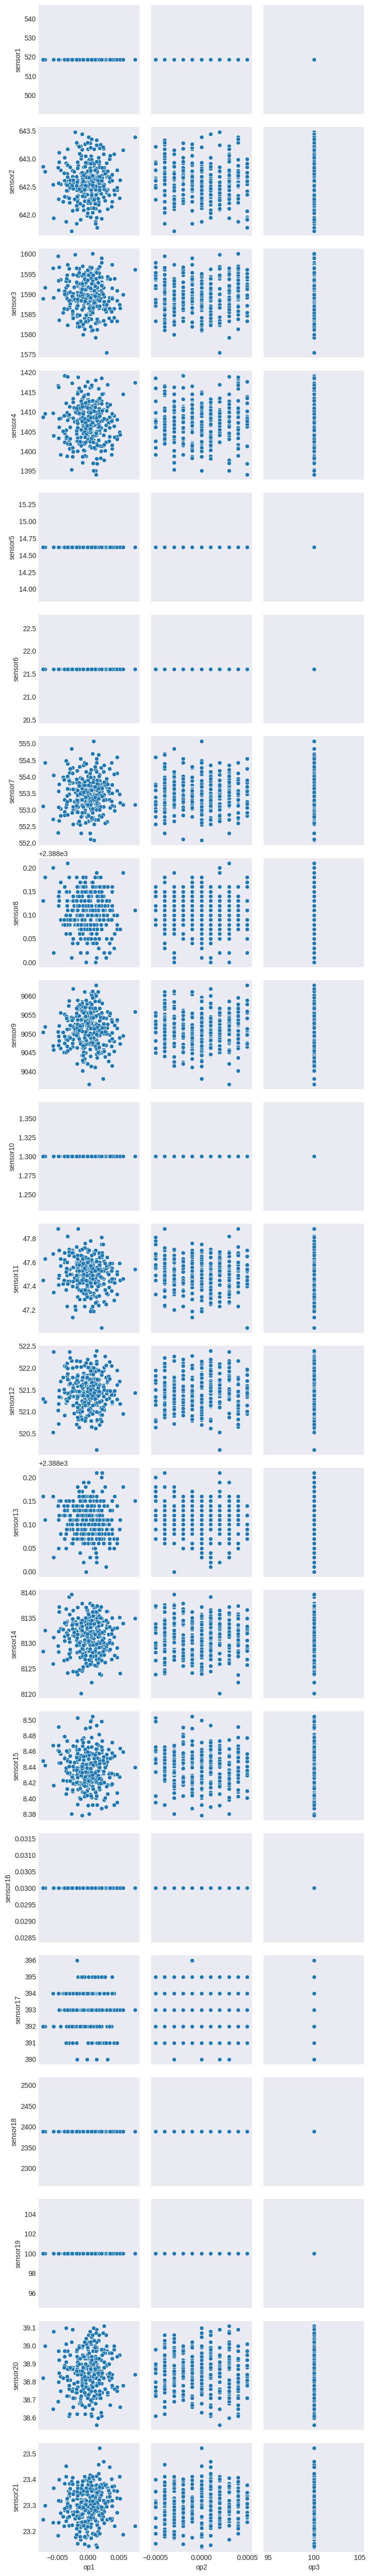

In [19]:
plt.style.use("seaborn-dark")
ax=sns.pairplot(test.query("cycle"),x_vars=op_set,y_vars=sensor,palette="hus1")

In [20]:
df_test.drop(["id","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19"],axis=1,inplace=True)

In [21]:
x=df_train.drop(["id","cycle","op3","sensor1","sensor5","sensor6","sensor10","sensor16","sensor18","sensor19","remaining_cycle"],axis=1)
y=df_train['remaining_cycle']

print('x shape :',x.shape)
print('y shape :',y.shape)

x shape : (20631, 16)
y shape : (20631,)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)
print('X_train shape : ',x_train.shape)
print('X_test shape : ',x_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape : ',y_test.shape)

X_train shape :  (16504, 16)
X_test shape :  (4127, 16)
y_train shape :  (16504,)
y_test shape :  (4127,)


In [23]:
df_train

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [24]:
x.head()

,op1,op2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


In [25]:
y

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: remaining_cycle, Length: 20631, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Use different regression methods - Linear Regression,Gradient Boost, Support Vector and Support Vector Regressor

In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)
y_pred_lr = lr_regressor.predict(x_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Model: Linear Regression\n  MAE: {mae_lr}\n  MSE: {mse_lr}\n RMSE: {rmse_lr}\n R2 score: {r2_lr}\n')

Model: Linear Regression
  MAE: 34.22939903596782
  MSE: 1988.4432937251534
 RMSE: 44.59196445241175
 R2 score: 0.5775635987528218



In [28]:
# Random Forest
rf_regressor=RandomForestRegressor(n_jobs=-1,n_estimators=400)
rf_regressor.fit(x_train,y_train)
y_pred_rf=rf_regressor.predict(x_test)


mae=mean_absolute_error(y_test,y_pred_rf)
mse=mean_squared_error(y_test,y_pred_rf)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_rf)
print(f'Model : RandomForestRegressor \n  MAE : {mae}\n  MSE : {mse}\n RMSE: {rmse}\n R2 score: {r2}\n')

Model : RandomForestRegressor 
  MAE : 29.400049067118974
  MSE : 1697.6393677898595
 RMSE: 41.202419440972875
 R2 score: 0.6393436677788367



In [32]:
#GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=400, loss='squared_error')
gb_regressor.fit(x_train, y_train)
y_pred_gb = gb_regressor.predict(x_test)


mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)
print(f'Model: GradientBoostingRegressor\n  MAE: {mae}\n  MSE: {mse}\n RMSE: {rmse}\n R2 score: {r2}\n')

Model: GradientBoostingRegressor
  MAE: 29.82537421984133
  MSE: 1723.4836687991567
 RMSE: 41.51486081873763
 R2 score: 0.6338531549009647



In [33]:
# Support Vector Regressor
svr_regressor = SVR()
svr_regressor.fit(x_train, y_train)
y_pred_svr = svr_regressor.predict(x_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Model: Support Vector Regressor\n  MAE: {mae_svr}\n  MSE: {mse_svr}\n RMSE: {rmse_svr}\n R2 score: {r2_svr}\n')

Model: Support Vector Regressor
  MAE: 56.32704233793859
  MSE: 4719.893989091554
 RMSE: 68.70148462072385
 R2 score: -0.0027215949843522047



In [34]:
df_test

,cycle,op1,op2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,rul_failed,remaining_cycle
0,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,143,142
1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,143,141
2,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,143,140
3,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,143,139
4,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,143,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8213.28,8.4715,394,38.65,23.1974,218,24
13092,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8210.85,8.4512,395,38.57,23.2771,218,23
13093,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8217.24,8.4569,395,38.62,23.2051,218,22
13094,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8220.48,8.4711,395,38.66,23.2699,218,21


In [35]:
y_pred_rf=rf_regressor.predict(df_test.drop(["cycle","rul_failed","remaining_cycle"],axis=1))

In [36]:
y_pred_lr = lr_regressor.predict(df_test.drop(["cycle","rul_failed","remaining_cycle"],axis=1))

In [37]:
y_pred_gb = gb_regressor.predict(df_test.drop(["cycle","rul_failed","remaining_cycle"],axis=1))

In [38]:
y_pred_svr = svr_regressor.predict(df_test.drop(["cycle","rul_failed","remaining_cycle"],axis=1))

In [39]:
df_excel_rf=pd.DataFrame(y_pred_rf,columns=["RUL-predicted"])

In [40]:
df_excel_lr=pd.DataFrame(y_pred_lr,columns=["RUL-predicted"])

In [41]:
df_excel_gb=pd.DataFrame(y_pred_gb,columns=["RUL-predicted"])

In [42]:
df_excel_svr=pd.DataFrame(y_pred_svr,columns=["RUL-predicted"])

In [43]:
df_excel_rf["TRUE-RUL"]=df_test["remaining_cycle"]

In [44]:
df_excel_lr["TRUE-RUL"]=df_test["remaining_cycle"]

In [45]:
df_excel_gb["TRUE-RUL"]=df_test["remaining_cycle"]

In [46]:
df_excel_svr["TRUE-RUL"]=df_test["remaining_cycle"]

Plot the Predicted and True RUL using the different regression methods

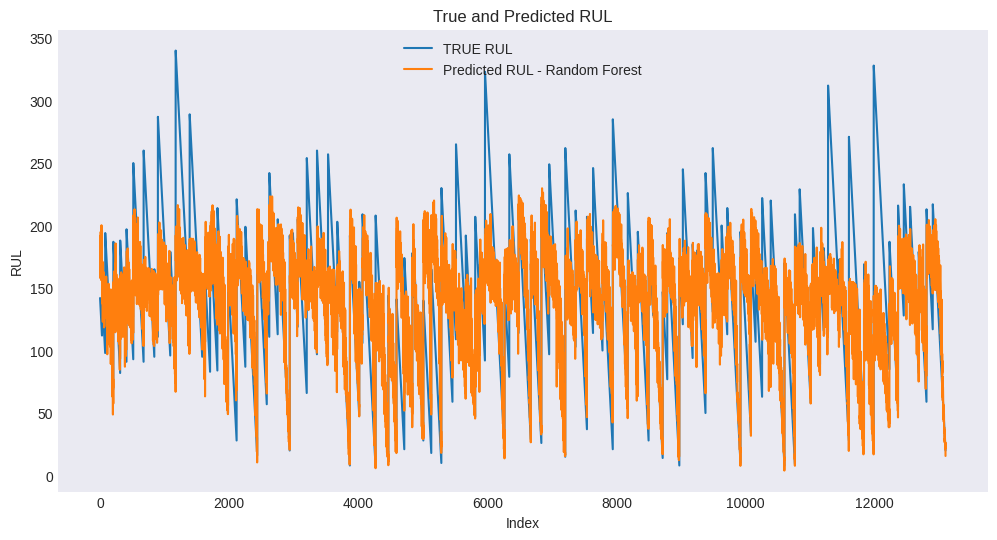

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df_test["remaining_cycle"],label='TRUE RUL')
plt.plot(y_pred_rf,label="Predicted RUL - Random Forest")
plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('True and Predicted RUL')
plt.legend()
plt.show()

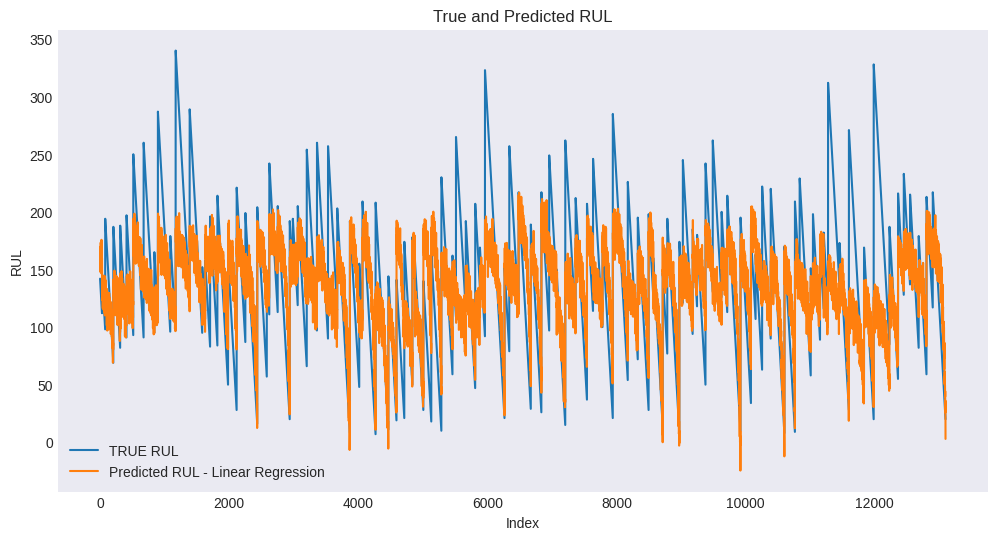

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df_test["remaining_cycle"],label='TRUE RUL')
plt.plot(y_pred_lr,label="Predicted RUL - Linear Regression")
plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('True and Predicted RUL')
plt.legend()
plt.show()

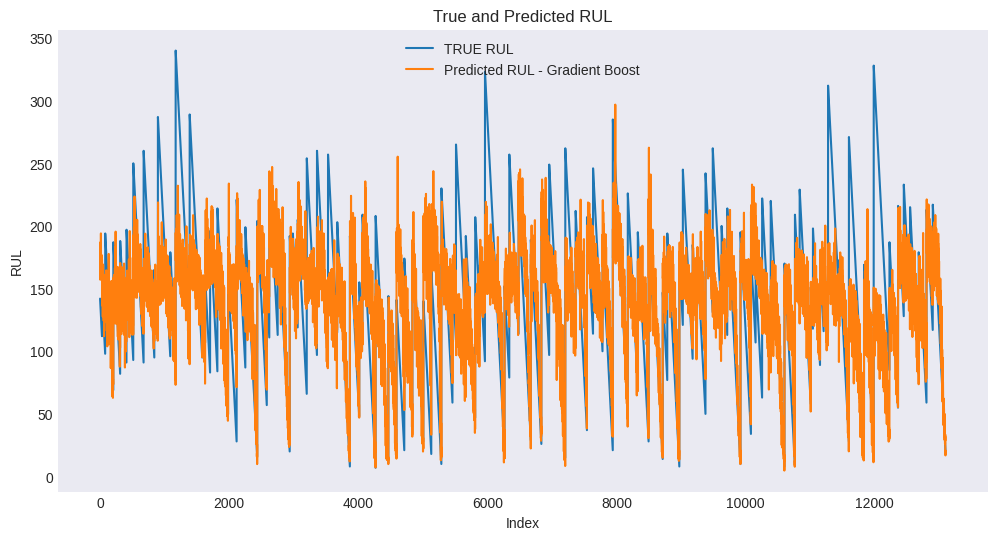

In [49]:
plt.figure(figsize=(12,6))
plt.plot(df_test["remaining_cycle"],label='TRUE RUL')
plt.plot(y_pred_gb,label="Predicted RUL - Gradient Boost")
plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('True and Predicted RUL')
plt.legend()
plt.show()

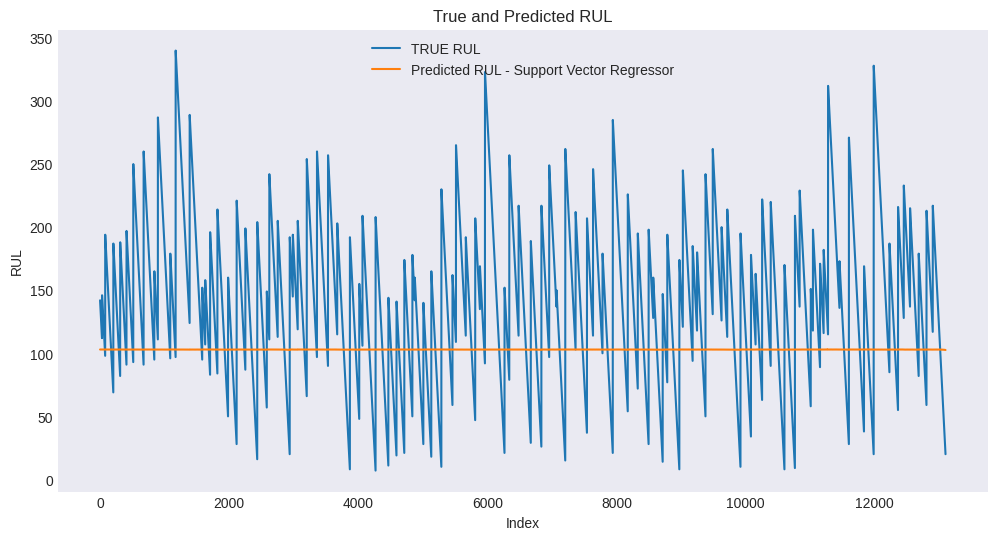

In [50]:
plt.figure(figsize=(12,6))
plt.plot(df_test["remaining_cycle"],label='TRUE RUL')
plt.plot(y_pred_svr,label="Predicted RUL - Support Vector Regressor")
plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('True and Predicted RUL')
plt.legend()
plt.show()